# Project Description

  In this project, we will assume that a bank has tasked us to create an machine learning model to predict which customers will default on their credit card payment next month with data the bank has collected for you. 
  
  The data inicludes information about the demographics, historical payment records, bill amounts owed and whether or not they have defaulted on their credit card payment on the past month. The data collected is from April - September 2005.
  
  
There are 25 variables:

 - OUTPUT: default or not
 - ID: ID of each client
 - LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
 - SEX: Gender (1=male, 2=female)
 - EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
 - MARRIAGE: Marital status (1=married, 2=single, 3=others)
 - AGE: Age in years
 - PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months,    9=payment delay for nine months and above)
 - PAY_2: Repayment status in August, 2005 (scale same as above)
 - PAY_3: Repayment status in July, 2005 (scale same as above)
 - PAY_4: Repayment status in June, 2005 (scale same as above)
 - PAY_5: Repayment status in May, 2005 (scale same as above)
 - PAY_6: Repayment status in April, 2005 (scale same as above)
 - BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
 - BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
 - BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
 - BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
 - BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
 - BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
 - PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
 - PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
 - PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
 - PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
 - PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
 - PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
   default.payment.next.month: Default payment (1=yes, 0=no)
   
This dataset was obtained from kaggle at: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset can be found at the UCI Machine Learning Repository.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### We must upload the dataset into the sagemaker IDE and then read csv with pandas

In [4]:

creditcard_df = pd.read_csv('UCI_Credit_Card.csv')


#### First lets take a peek at the data

In [5]:
creditcard_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


#### As we can see, we have all 24 predictor variables and the output variable in the last column. Let's go ahead and extract some basic info from the data.

In [6]:
creditcard_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# Let's visualize all this data

#### It's always necessary to check for missing values

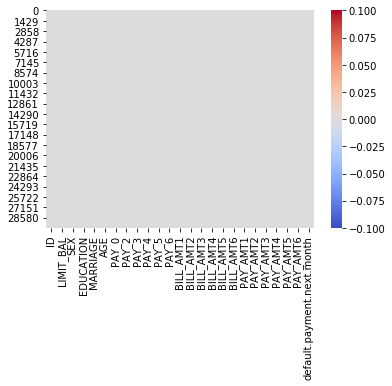

In [7]:
sns.heatmap(creditcard_df.isnull(), cmap="coolwarm")

#### As the graph above shows, we got no missing values, which simplifies our work quite a bit. Now let's create histograms to get an idea of the number of customers is distriibuted with respect to each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7496812690>,
      dtype=object)

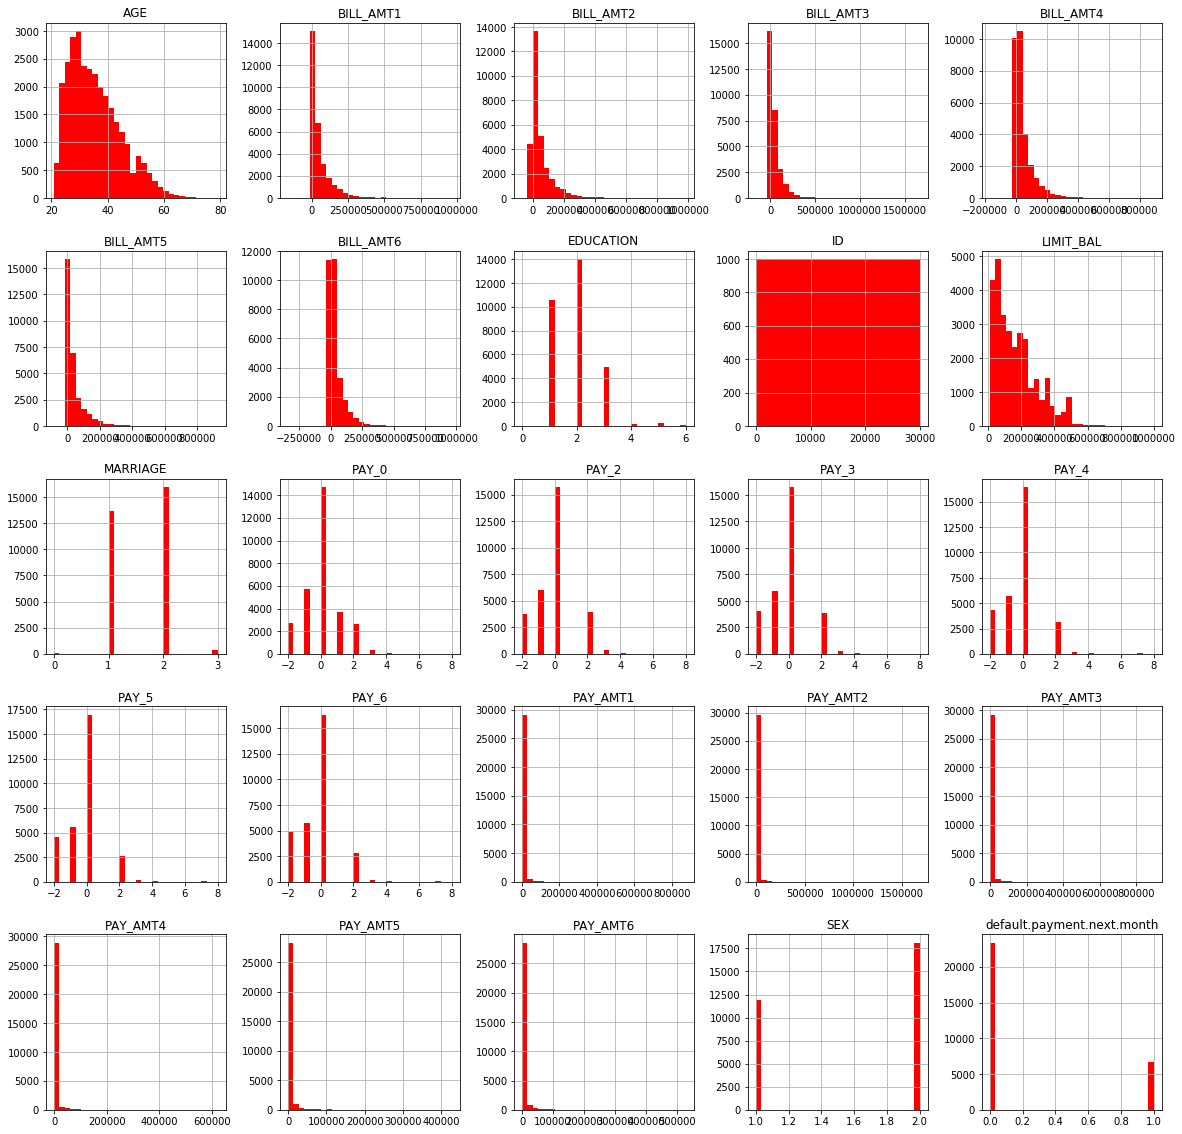

In [8]:
creditcard_df.hist(bins = 30, figsize = (20,20), color = 'r')

#### Let's drop the ID column, since we will not be needing it

In [9]:
creditcard_df.drop(['ID'], axis=1, inplace=True)

#### Lets verify it has been dropped

In [10]:
creditcard_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


#### Nice, lets keep going. Lets see what are the prior probablities of customers actually defaulting a payment or not defaulting.

In [11]:
default_df = creditcard_df[creditcard_df['default.payment.next.month'] == 1] # 1 means they have defaulted on a payment

nodefault_df = creditcard_df[creditcard_df['default.payment.next.month'] == 0] # 0 means they haven't


In [12]:


print("Total Number of customers = ", len(creditcard_df))
print()

print("Number of customers who defaulted on their credit card payments (did not pay their balance) = ", len(default_df))
print()

print("Percentage of customers who defaulted on their credit card payments (did not pay their balance) = " , 1.*len(default_df)/len(creditcard_df)*100.0, "%")
print()

print("Number of customers who did not default on their credit card payments (paid their balance) = ", len(nodefault_df))
print()

print("Percentage of customers who did not default on their credit card payments (paid their balance) = ", 1.*len(nodefault_df)/len(creditcard_df)*100.0, "%")

Total Number of customers =  30000

Number of customers who defaulted on their credit card payments (did not pay their balance) =  6636

Percentage of customers who defaulted on their credit card payments (did not pay their balance) =  22.12 %

Number of customers who did not default on their credit card payments (paid their balance) =  23364

Percentage of customers who did not default on their credit card payments (paid their balance) =  77.88000000000001 %


### Here is a quick description of the data, where we can get some basic statistcs like the count, mean, maximum and minimum values from each variable.

In [13]:
default_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,1.482833,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [13]:
nodefault_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,23364.0
mean,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769,0.0
std,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,0.977591,...,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473,0.0
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000,0.0
50%,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000,0.0
75%,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


#### Now lets check if any of the variables are highly correlated, since having highly correlated features can reduce the interpretability of the model.

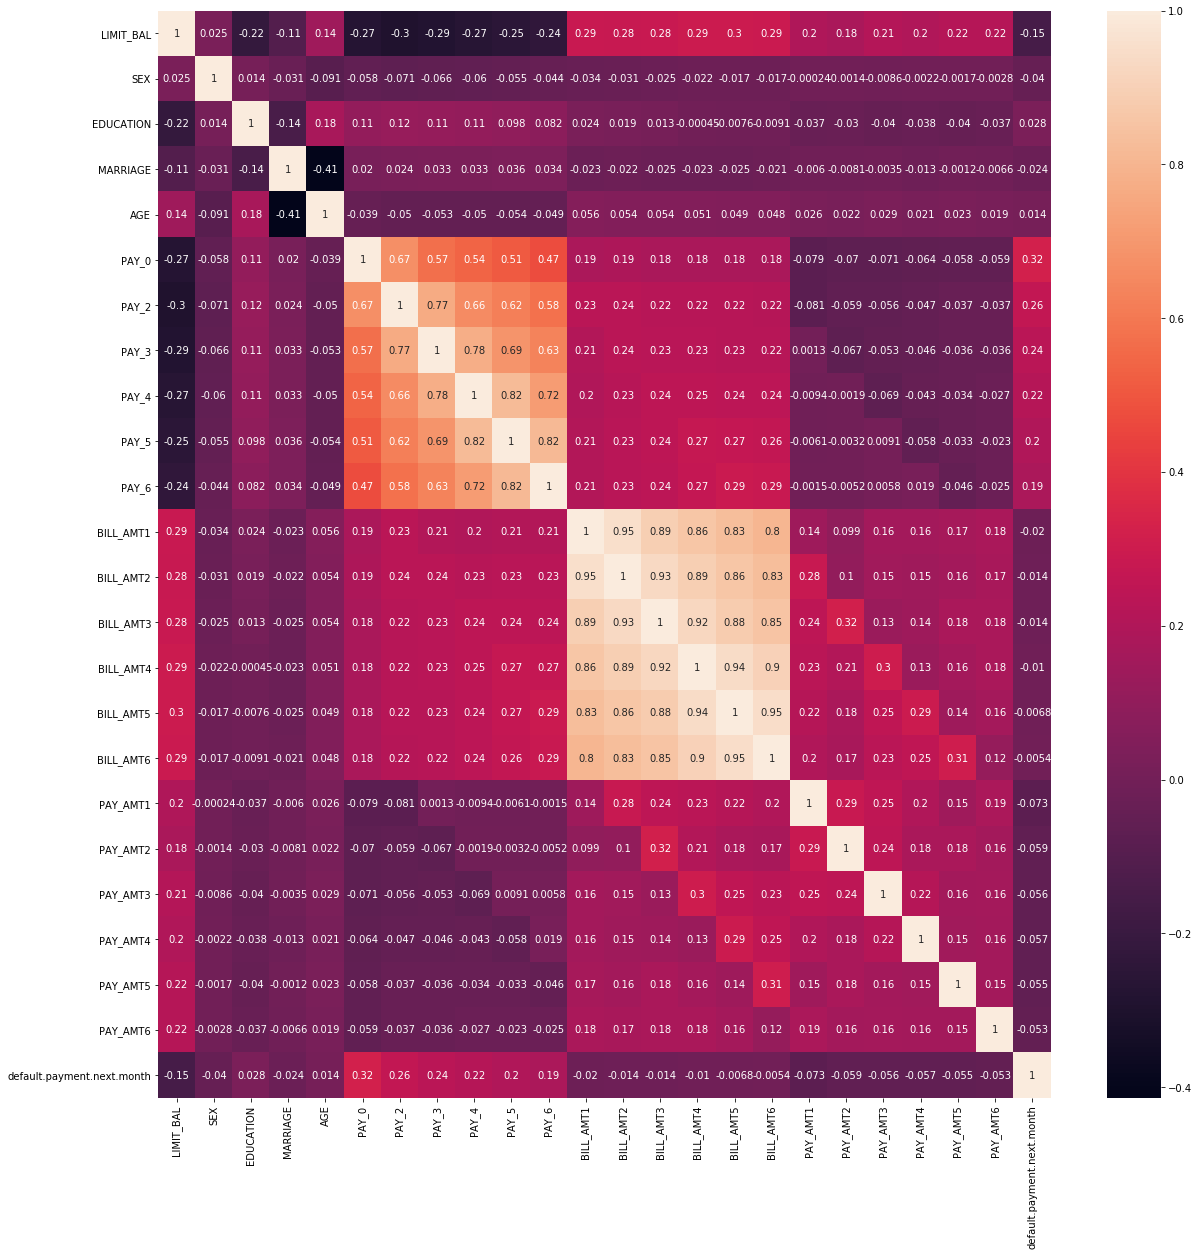

In [19]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

#### following the heatmap above, we can see that the only correlated variables are the delay on payments with other delay on payments, and the bill amounts with other bill amounts, which is not surprising, so we are good to move on. The next graph is a countplot of whether or not customers default on their payments, varying with age.

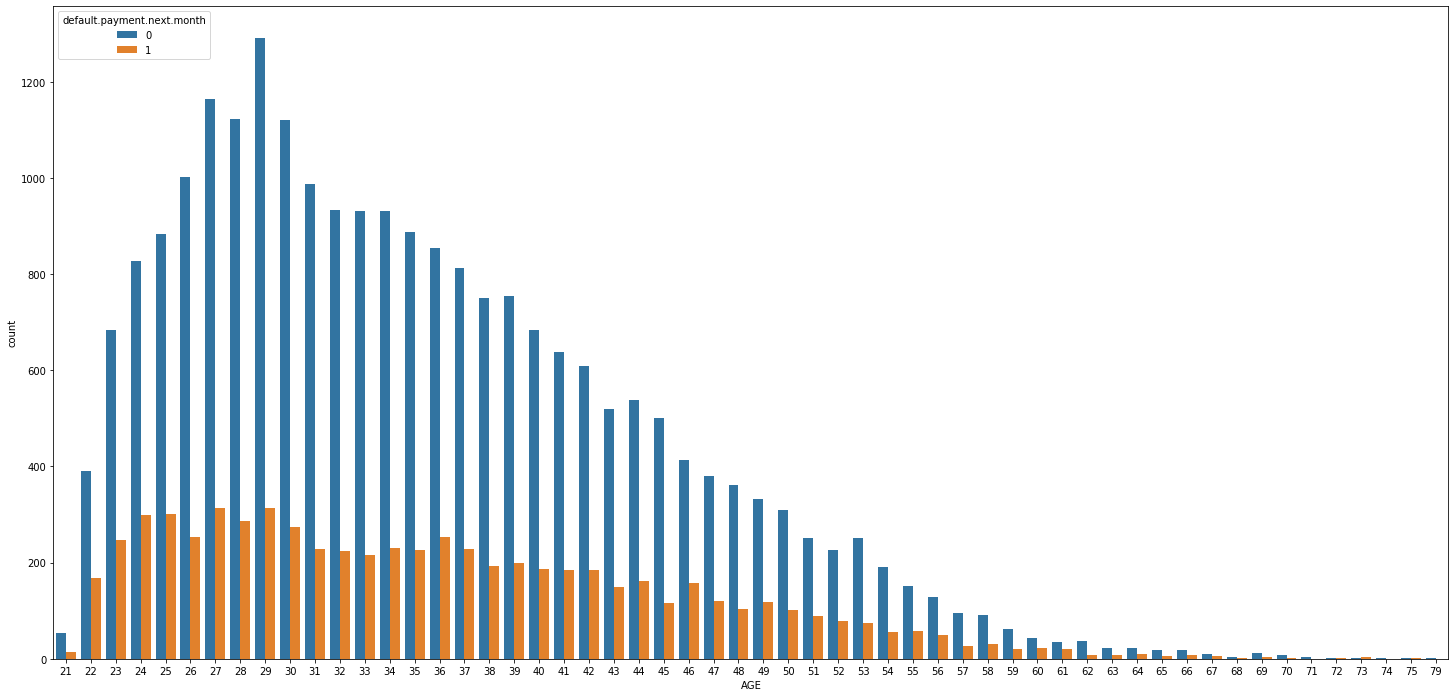

In [20]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'AGE', hue = 'default.payment.next.month', data = creditcard_df)

#### From the countplot above, we can see that the ratio of payers to non payers, (0 and 1 respectively), is generally higher in the younger group, with an exception of ages 21 to 22. From there, the ratio seems to be at its highest from 23 to 29, and then it starts slowly decreasing with age at a relatively constant rate. 

#### This could be due to the fact that at 21 and 22 years of age, people are just graduating from university and have recently acquired a job and a credit card. Some of this people might lose their job or are just messy with their finances which could translate to more people defaulting on their credit card payments. From 23 to 29, people are more stable with their jobs and finances, but as people grow older and get a family, cars, and/or new homes, debt might start stacking up which could again translate into a lower rate of credit card payments.  Another reason for this decline could be that as people grow older, they stop caring about paying their "less immediate" bills.

#### Now lets create similar countplots but for education, sex and marriage status.

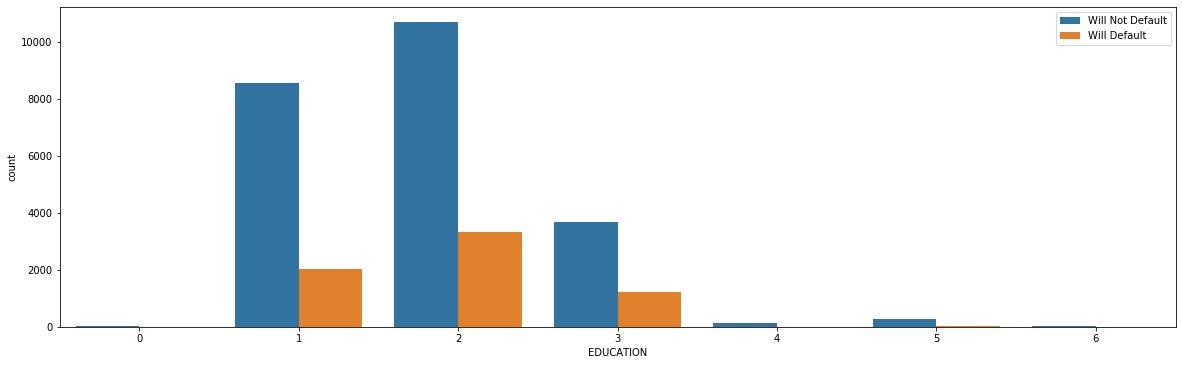

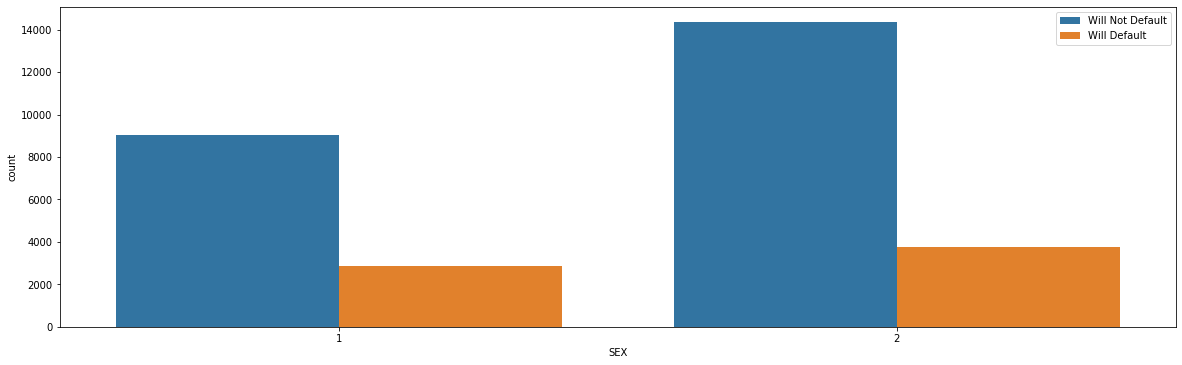

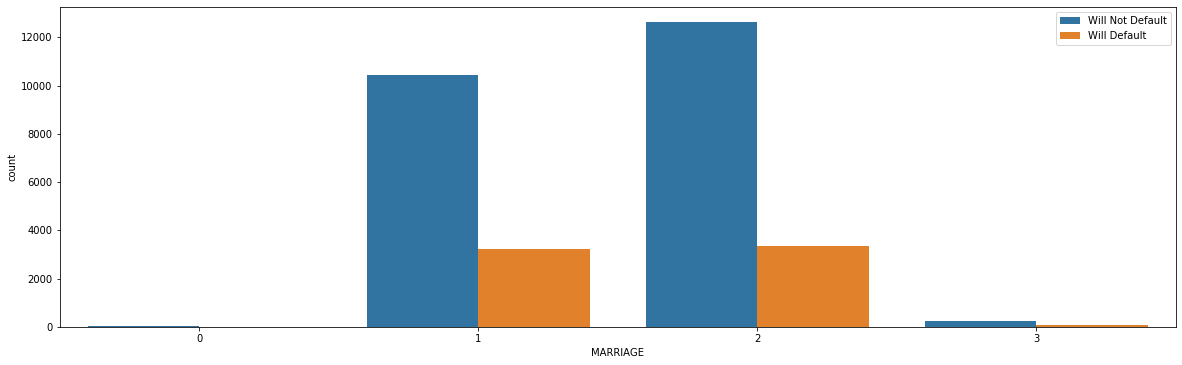

In [20]:
plt.figure(figsize=[20,20])
plt.subplot(311)
g1 = sns.countplot(x = 'EDUCATION', hue = 'default.payment.next.month', data = creditcard_df)
plt.legend(labels=['Will Not Default', 'Will Default'])
plt.show(g1)

plt.figure(figsize=[20,20])
plt.subplot(312)
g2 = sns.countplot(x = 'SEX', hue = 'default.payment.next.month', data = creditcard_df)
plt.legend(labels=['Will Not Default', 'Will Default'])
plt.show(g2)

plt.figure(figsize=[20,20])
plt.subplot(313)
g3 = sns.countplot(x = 'MARRIAGE', hue = 'default.payment.next.month', data = creditcard_df)
plt.legend(labels=['Will Not Default', 'Will Default'])
plt.show(g3)



#### As we can expect, graduate and university students, (1 and 2 respectively), are more in debt than high school students. From the second plot, we can see that females seem to have a higher ratio of credit card payments than their male counterparts, and from the third graph we can see  there doesnt seem to be a difference in defaulting credit card payments when it comes to marital status, but single people tend to have a better ratio.

#### Next, lets take a loook at the KDE. KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. KDE describes the probability density at different values in a continuous variable. This means that given a range, we can calculate the probability of an observation being within that range. 

Text(0.5, 0, 'Amount of bill statement in September, 2005 (NT dollar)')

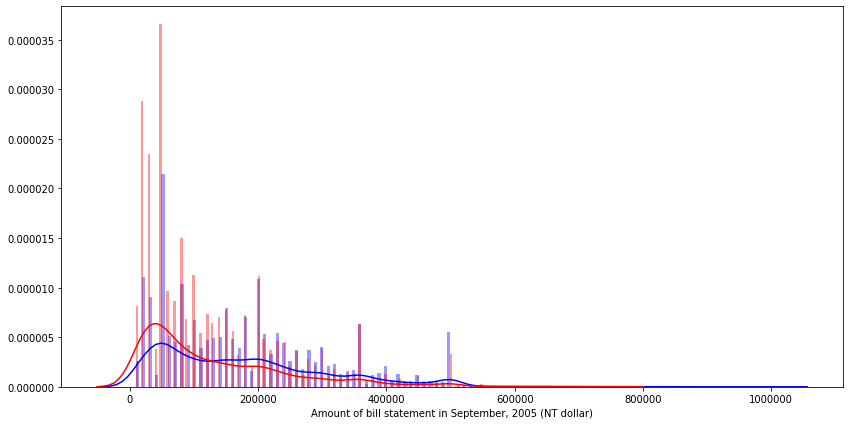

In [187]:
plt.figure(figsize=(14,7))

sns.distplot(nodefault_df['LIMIT_BAL'],label = 'Customers who did not default (paid balance)', bins = 200, color = 'b')
sns.distplot(default_df['LIMIT_BAL'],label = 'Customers who defaulted (did not pay balance)',  bins = 200, color = 'r')

plt.xlabel('Amount of bill statement in September, 2005 (NT dollar)')
#plt.xlim(0, 200000)


Text(0.5, 0, 'Amount of bill statement in September, 2005 (NT dollar)')

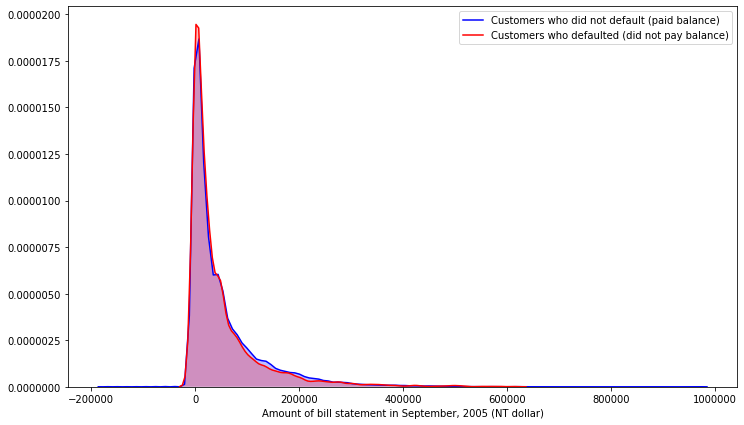

In [188]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 

plt.figure(figsize=(12,7))

sns.kdeplot(cc_nodefault_df['BILL_AMT1'], label = 'Customers who did not default (paid balance)', shade = True, color = 'b')
sns.kdeplot(cc_default_df['BILL_AMT1'], label = 'Customers who defaulted (did not pay balance)', shade = True, color = 'r')

plt.xlabel('Amount of bill statement in September, 2005 (NT dollar)')
#plt.xlim(0, 200000)


#### Both distributions for people who defaulted vs. people who did not default seem to bee the same in terms of bill statements.

(0, 200000)

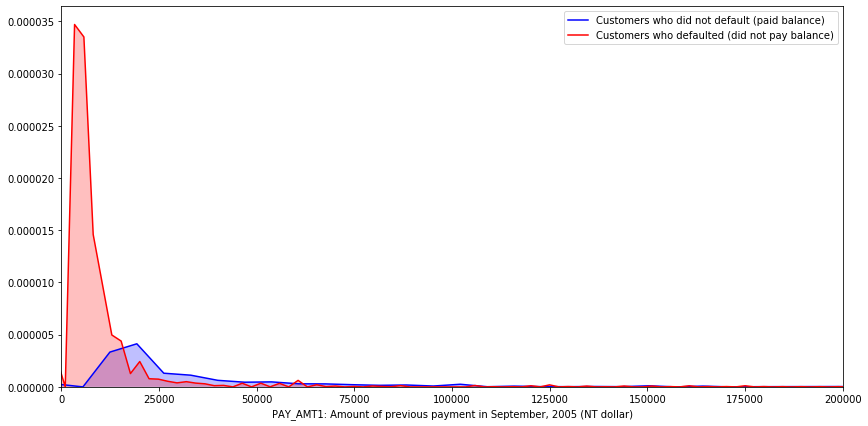

In [189]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 

plt.figure(figsize=(14,7))

sns.kdeplot(nodefault_df['PAY_AMT1'], label = 'Customers who did not default (paid balance)', shade = True, color = 'b')
sns.kdeplot(default_df['PAY_AMT1'], label = 'Customers who defaulted (did not pay balance)', shade = True, color = 'r')

plt.xlabel('PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)')
plt.xlim(0, 200000)

#### In the case of Amount of Previous Payments in the month of September, it seems like customers who default on their payments have a smaller average payment amount.  We can also note for smaller payments, (1,000 to 10,000), it is more likely that a customer chosen at random will default on. their payment, while for higher payments, (20,000 to 50,000), a random customer will more likely pay their credit card balance.

#### Lets see the impact of gender on customer's balance limit

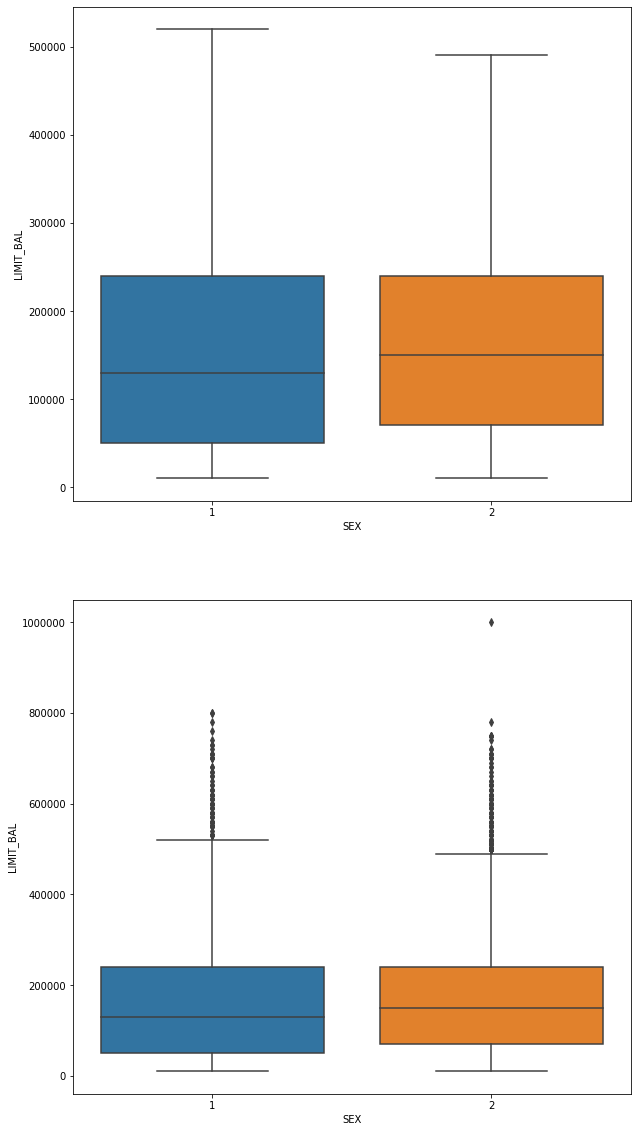

In [25]:
plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = creditcard_df, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = creditcard_df)


#### There doesn't seem to be much of a difference. Lets take a look at some other variables before we go on.

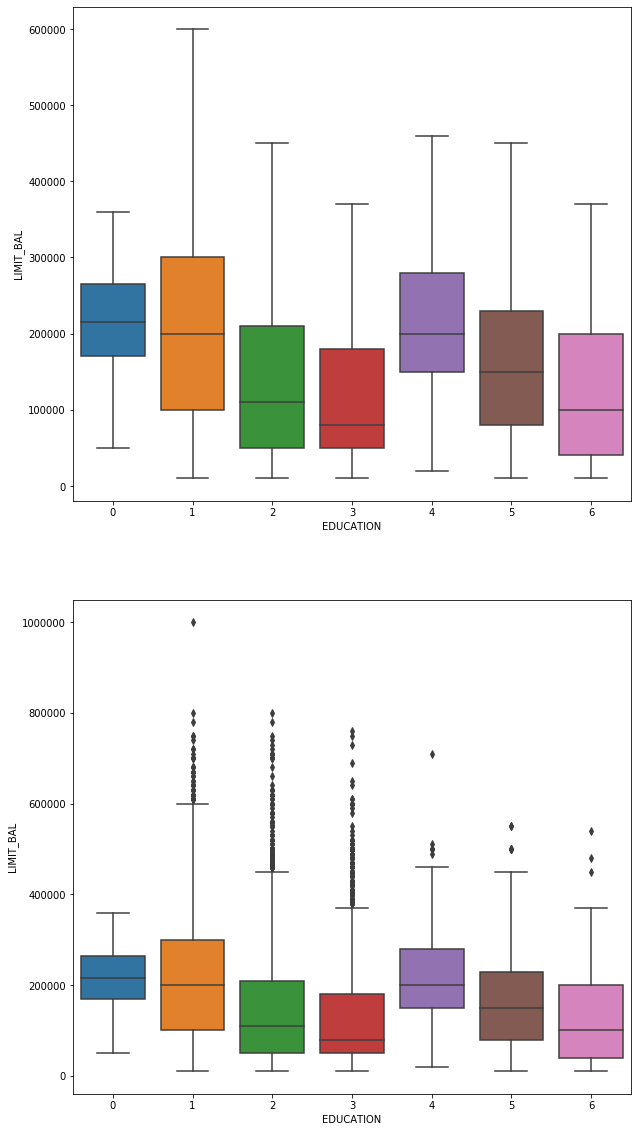

In [14]:
plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'EDUCATION', y = 'LIMIT_BAL', data = creditcard_df, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'EDUCATION', y = 'LIMIT_BAL', data = creditcard_df)


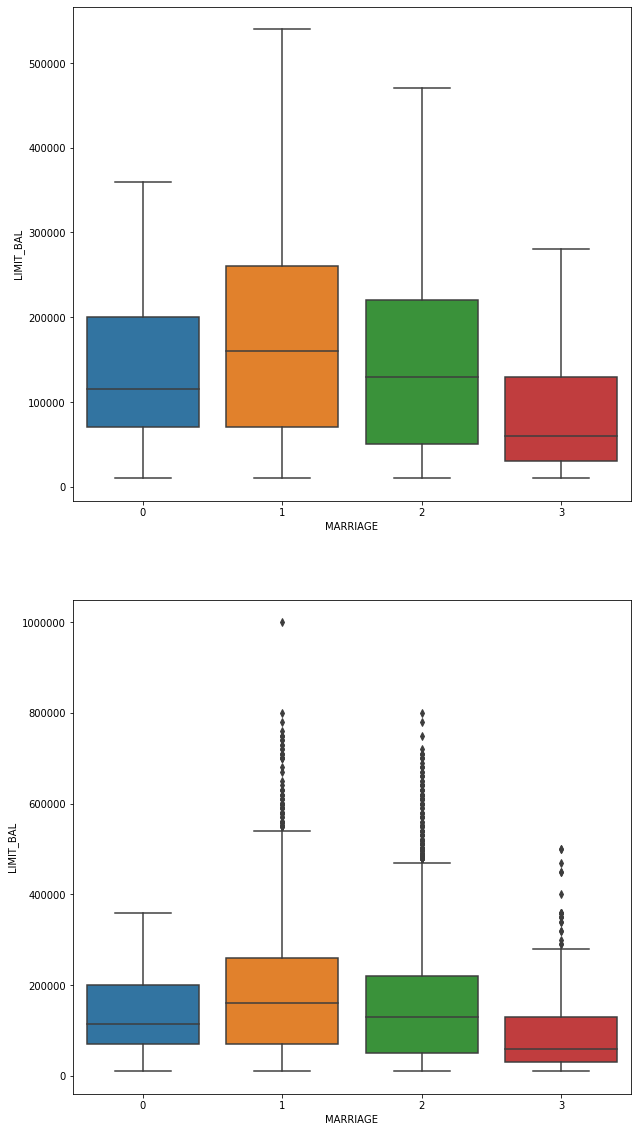

In [26]:
plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = creditcard_df, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = creditcard_df)


# Data Preprocessing and Cleaning

In [21]:
creditcard_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


#### Let's separate our categorical variables in a different dataframe to perform onehotencoding on it and convert it into vector form so that our model can work with the data

In [22]:
X_cat = creditcard_df[['SEX', 'EDUCATION', 'MARRIAGE']]
X_cat

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


In [23]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

#### Lets see our resulting categorical variables dataframe

In [24]:
X_cat.shape

(30000, 13)

In [25]:
X_cat = pd.DataFrame(X_cat)

In [26]:
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Now lets move on to the numerical variables

In [27]:
# note that we dropped the target 'default.payment.next.month' since we are creating the feature dataframe
X_numerical = creditcard_df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
X_numerical

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


#### Let's concatenate our onehotencoded categorical variables and our numerical variables

In [28]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


#### let's scale our data 

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [30]:
y = creditcard_df['default.payment.next.month']
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

## Let's train and evaluate an XGBoost model locally first

#### Let's split the data into training and testing

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [39]:
!pip install xgboost

     |████████████████████████████████| 127.6 MB 16 kB/s s eta 0:00:01   |█████████▉                      | 39.2 MB 3.9 MB/s eta 0:00:23


In [40]:
import xgboost as xgb


model = xgb.XGBClassifier(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

Accuracy 81.33333333333333 %


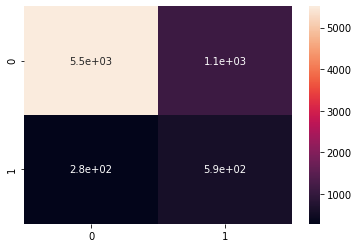

In [169]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.83      0.95      0.89      5793
        True       0.68      0.35      0.46      1707

    accuracy                           0.81      7500
   macro avg       0.75      0.65      0.67      7500
weighted avg       0.80      0.81      0.79      7500



#### Lets do a grid search to try and optimize the parameters

In [165]:
param_grid = {
        'gamma': [0.5, 1, 1.25],   # regularization parameter 
        'subsample': [0.2, 0.3, 0.4], # % of rows taken to build each tree
        'colsample_bytree': [ 0.6, 0.8, 0.9], # number of columns used by each tree
        'max_depth': [3, 4, 5] # depth of each tree
        }

In [166]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=300, objective='binary:logistic')
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb_model, param_grid, refit = True, verbose = 4, n_jobs = -1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 27.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, 

In [171]:
y_predict_optim = grid.predict(X_test)

In [172]:
y_predict_optim

array([0, 0, 0, ..., 0, 0, 0])

#### Here are the best parameters and some metrics about our grid search result

In [173]:
best_params = grid.best_params_
best_params

{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 3, 'subsample': 0.3}

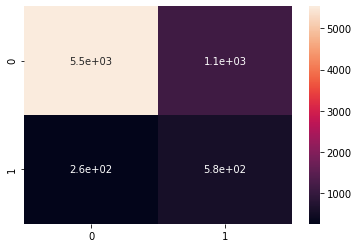

In [174]:
# Testing Set Performance
cm = confusion_matrix(y_predict_optim, y_test)
sns.heatmap(cm, annot=True)

In [175]:
print(classification_report(y_test, y_predict_optim))

              precision    recall  f1-score   support

       False       0.83      0.96      0.89      5793
        True       0.69      0.34      0.46      1707

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500



#### There was almost no improvement, which is disappointing but expected. Nonetheless, an accuracy of 82% and a f1-score of 89% is not that bad

## Now let's train XGBoost using AWS SageMaker

In [32]:
y_train.shape

(22500,)

In [33]:
X_train.shape

(22500, 33)

#### Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
This is because sagemaker built-in algorithm expects the data in this format.


In [34]:
train_data = pd.DataFrame({'Target': y_train})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]
    

In [35]:
train_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
29247,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.117409,0.183679,0.096549,0.273787,0.000000,0.002375,0.001674,0.004831,0.005861,0.009458
26124,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.121924,0.222918,0.130911,0.300022,0.003320,0.001412,0.004984,0.000003,0.004305,0.003492
24698,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.088223,0.160421,0.090152,0.267414,0.003348,0.002031,0.000336,0.016452,0.000000,0.000000
6986,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.086919,0.159913,0.082111,0.261969,0.001472,0.000622,0.000000,0.004831,0.000000,0.000000
16761,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.113294,0.191370,0.099829,0.275526,0.002570,0.000981,0.001671,0.017037,0.001606,0.001332


In [36]:
val_data = pd.DataFrame({'Target':y_test})
for i in range(X_test.shape[1]):
    val_data[i] = X_test[:,i]

In [37]:
val_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
12697,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.098442,0.175503,0.095139,0.260979,0.005724,0.000594,0.000364,0.000470,0.000000,0.000000
7702,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.087583,0.162536,0.083276,0.265809,0.000267,0.001345,0.002855,0.004288,0.014777,0.000023
7632,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.105376,0.193846,0.117401,0.288890,0.004579,0.001187,0.002232,0.003221,0.000000,0.006810
5096,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.095264,0.174255,0.095817,0.272849,0.001455,0.000737,0.000762,0.001130,0.001297,0.001368
14205,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.161864,0.250889,0.174055,0.335574,0.007783,0.003028,0.003683,0.005475,0.017492,0.006617


In [38]:
val_data.shape

(7500, 34)

#### save train_data and validation_data as csv files.


In [39]:
train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

#### Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python

#### Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2


In [40]:
import sagemaker
import boto3

# Create a sagemaker session
sagemaker_session = sagemaker.Session()

#S 3 bucket and prefix that we want to use
# default_bucket - creates a Amazon S3 bucket to be used in this session
bucket = 'credit-card-default-project'
prefix = 'XGBoost'
key = 'XGBoost-Regressor'
#Roles give learning and hosting access to the data
#This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()

In [41]:
print(role)

arn:aws:iam::570340131680:role/service-role/AmazonSageMaker-ExecutionRole-20200801T201540


#### Read the data from csv file and then upload the data to s3 bucket

In [42]:
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://credit-card-default-project/XGBoost/train/XGBoost-Regressor


In [43]:
with open('validation.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training

    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
# Let's print out the validation data location in s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

uploaded validation data location: s3://credit-card-default-project/XGBoost/validation/XGBoost-Regressor


#### Now lets create an output placeholder in S3 bucket to store the output


In [44]:
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://credit-card-default-project/XGBoost/output


#### This code is used to get the training container of sagemaker built-in algorithms. All we have to do is to specify the name of the algorithm that we want to use

#### Let's obtain a reference to the XGBoost container image.

#### Note that all regression models are named estimators. You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session


In [45]:
from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'xgboost','1.0-1') # Latest version of XGboost

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


#### Now we'll have to specify the type of instance that we would like to use for the training output path and sagemaker session into the Estimator. We can also specify how many instances we would like to use for training

#### Recall that XGBoost works by combining an ensemble of weak models to generate accurate/robust results.  The weak models are randomized to avoid overfitting. Here are some parameters that we will try to tune:

#### num_round: The number of rounds to run the training.

#### alpha: L1 regularization term on weights. Increasing this value makes models more conservative.

#### colsample_by_tree: fraction of features that will be used to train each tree.

#### eta: Step size shrinkage used in updates to prevent overfitting. 
After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.



In [46]:
Xgboost_regressor1 = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.m4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

#We can tune the hyper-parameters to improve the performance of the model

Xgboost_regressor1.set_hyperparameters(max_depth = 10,
                           objective = 'binary:logistic',
                           colsample_bytree = 0.3,
                           alpha = 8,
                           eta = 0.1,
                           num_round = 150
                           )



In [47]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')


data_channels = {'train': train_input,'validation': valid_input}


Xgboost_regressor1.fit(data_channels)

2020-08-06 21:14:13 Starting - Starting the training job...
2020-08-06 21:14:16 Starting - Launching requested ML instances......
2020-08-06 21:15:28 Starting - Preparing the instances for training......
2020-08-06 21:16:36 Downloading - Downloading input data
2020-08-06 21:16:36 Training - Downloading the training image...
2020-08-06 21:17:12 Training - Training image download completed. Training in progress..INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[21:17:13] 22500x33 matrix with 742500 entries loaded from /opt/ml/

# Deploy the Model

#### Deploy the model to perform inference 

In [48]:
Xgboost_regressor = Xgboost_regressor1.deploy(initial_instance_count = 1, 
                                              instance_type = 'ml.t2.medium')

-----------------!

### Deployment succesful! 

#### Content type over-rides the data that will be passed to the deployed model, since the deployed model expects data
in text/csv format, we specify this as content_type.

#### Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content
type

#### Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html


In [49]:

from sagemaker.predictor import csv_serializer, json_deserializer

Xgboost_regressor.content_type = 'text/csv'
Xgboost_regressor.serializer = csv_serializer
Xgboost_regressor.deserializer = None

In [50]:
XGB_prediction = Xgboost_regressor.predict(np.array(X_test))

#### custom code to convert the values in bytes format to array

In [51]:
def bytes_2_array(x):
    
    # makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    # Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    #same-thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    # iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    # converting the list into array
    l = np.array(l).astype('float32')
    
    # reshape one-dimensional array to two-dimensional array
    return l.reshape(-1,1)

In [52]:
predicted_values = bytes_2_array(XGB_prediction)
predicted_values = np.around(predicted_values, decimals=0)

In [53]:
predicted_values

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [54]:
y_test= np.array(y_test)
y_test = y_test.reshape(-1,1)

In [55]:
# (y_test>0.5)
y_test = np.around(y_test, decimals=0)
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

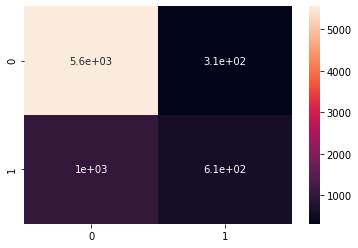

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, predicted_values)
sns.heatmap(cm, annot=True)

In [57]:
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5864
           1       0.66      0.37      0.48      1636

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500



#### Precision can be understood as "Out of all of the observations that our model predicted true (positive), how many are actually true?" and Recall as "Out of all the actual true (positive) observations, how many did we predict correctly?"

#### Precision = # of True Positives/(# of True Positives + # of False Positives)

#### Recall = # of True Positives/(3 of True Positive + # of False Negatives)

#### As we can see, while the accuracy and the f1-score for prediction = 0, (customers will not default) are alright, (82% and 89% respectively), the f1-score for prediction = 1, (customers will default), is actually horrible. This is because the percision and specially the recall for this particular prediction are not good. 

#### Improving this metrics will be the main source of focus for upcoming updates to this project.

#### Delete the endpoint so we dontt get charged while werre noot using thee deployed model

In [59]:
Xgboost_regressor.delete_endpoint()

# Recap

#### We have imported a dataset from a bank in Taiwan, visualized it and performed some basic analysis. Then we trained a model locally using XGBoost algorithm, performed some hyperparameter tuning and evaluated the best model. We finally trained and deployed a model, (which wound up being very easy, specially the deployment part), in AWS Sagemaker and evaluated it as well. 

# Next Up

#### We will next attempt to solve the same problem but using Sagemaker Autopilot, which will simplify the amount of actual work done by us to nearly zero, and we shall see how the two methods compare.